# Изучение закономерностей, определяющих успешность игр

 Из открытых источников взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные представлены до 2016 года.
 
 Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных

``Name`` — название игры  
``Platform`` — платформа  
``Year_of_Release`` — год выпуска  
``Genre`` — жанр игры  
``NA_sales`` — продажи в Северной Америке (миллионы проданных копий)  
``EU_sales`` — продажи в Европе (миллионы проданных копий)  
``JP_sales`` — продажи в Японии (миллионы проданных копий)  
``Other_sales`` — продажи в других странах (миллионы проданных копий)  
``Critic_Score`` — оценка критиков (максимум 100)  
``User_Score`` — оценка пользователей (максимум 10)  
``Rating`` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательских-анализ-данных" data-toc-modified-id="Исследовательских-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Исследовательских анализ данных</strong></a></span><ul class="toc-item"><li><span><a href="#Cколько-игр-выпускалось-в-разные-годы" data-toc-modified-id="Cколько-игр-выпускалось-в-разные-годы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cколько игр выпускалось в разные годы</a></span></li><li><span><a href="#За-какой-характерный-срок-появляются-новые-и-исчезают-старые-платформы" data-toc-modified-id="За-какой-характерный-срок-появляются-новые-и-исчезают-старые-платформы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>За какой характерный срок появляются новые и исчезают старые платформы</a></span></li><li><span><a href="#Какие-платформы-лидируют-по-продажам,-растут-или-падают" data-toc-modified-id="Какие-платформы-лидируют-по-продажам,-растут-или-падают-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Какие платформы лидируют по продажам, растут или падают</a></span></li><li><span><a href="#«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам" data-toc-modified-id="«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>«ящик с усами» по глобальным продажам игр в разбивке по платформам</a></span></li><li><span><a href="#Корреляция-между-отзывами-и-продажами" data-toc-modified-id="Корреляция-между-отзывами-и-продажами-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Корреляция между отзывами и продажами</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Распределение игр по жанрам</a></span></li><li><span><a href="#Популярность-платформ-по-регионам" data-toc-modified-id="Популярность-платформ-по-регионам-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Популярность платформ по регионам</a></span></li><li><span><a href="#Популярность-жанров-по-регионам" data-toc-modified-id="Популярность-жанров-по-регионам-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Популярность жанров по регионам</a></span></li><li><span><a href="#Влияние-возрастного-рейтинга-по-регионам" data-toc-modified-id="Влияние-возрастного-рейтинга-по-регионам-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Влияние возрастного рейтинга по регионам</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_rows', 10, 'display.max_columns', None)

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

In [3]:
#переименуем столбцы
data.columns = data.columns.str.lower()

In [5]:
#удалим абсолютно пустые строки
print(data.query('name.isna()'))
data = data[data['name'].isna() != True]

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [6]:
data.query('critic_score.isna() and user_score.isna() and rating.isna()')
#предположим, что рейтинги игры кореллируются с ее продажами
non_null_data = data.query('not critic_score.isna() and not user_score.isna() and not rating.isna() and user_score != "tbd"')
non_null_data
#посмотрим на полностью заполненные данные и там где нет ТБД

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16663,E.T. The Extra-Terrestrial,GBA,2001.0,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
16673,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T


In [7]:
non_null_data['user_score'] = non_null_data['user_score'].astype('float')
non_null_data.corr()

/tmp/ipykernel_82/2863358091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_data['user_score'] = non_null_data['user_score'].astype('float')


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.016281,0.041319,-0.038469,0.042274,-0.007867,-0.254104
na_sales,-0.016281,1.000000,0.840107,0.467366,0.726972,0.233994,0.086496
eu_sales,0.041319,0.840107,1.000000,0.519173,0.716320,0.212247,0.055729
jp_sales,-0.038469,0.467366,0.519173,1.000000,0.394378,0.146299,0.126711
other_sales,0.042274,0.726972,0.716320,0.394378,1.000000,0.191423,0.057342
critic_score,-0.007867,0.233994,0.212247,0.146299,0.191423,1.000000,0.582061
user_score,-0.254104,0.086496,0.055729,0.126711,0.057342,0.582061,1.000000


TBD значит "To be determind", значит рейтинг пока что не рассчитался. С продажами корелляция слабая, но оценки игроков и критиков кореллируются между собой. Хоть и присутствует средняя корелляция, заполнять пропуски будет некорректно, поэтому оставим как есть. Значение "TBD" заменим на пропуски для перевода столбца в тип float

In [9]:
data['rating'] = data['rating'].fillna('Unknown')
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN
data = data.dropna(subset = ['year_of_release'])
#удаляем и заполняем все пропуски после проведенного анализа.
#пропущенные годы не восстановить, но их не так много, поэтому удалим

In [10]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors = 'ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'ignore')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


## **Исследовательских анализ данных**

### Cколько игр выпускалось в разные годы

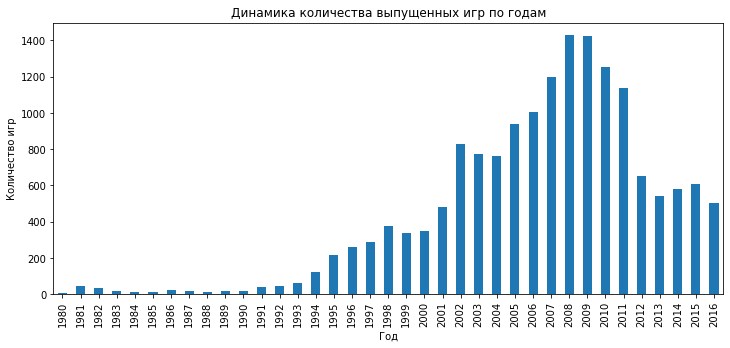

In [13]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index() \
.plot(kind = 'bar', 
      x = 'year_of_release', 
      y ='name', 
      xlabel = 'Год', 
      ylabel = 'Количество игр', 
      figsize = (12,5), 
      legend = None) \
.set_title('Динамика количества выпущенных игр по годам')
plt.show()

С 2005 по 2010 гг. наблюдается значительный подъем гейм-индустрии и достижение наибольших объемов производства игр. Вероятно, это связано с появлением консолей нового поколения таких как PS3 и XBox 360.

Для нашего анализа логично взять период с 2013 г., когда прошел пик, спад и с подъема начался новый цикл

### За какой характерный срок появляются новые и исчезают старые платформы

In [14]:
df = []
for platform in data['platform'].unique():
    df.append({'platform' : platform, 'years' : data.loc[data['platform'] == platform, 'year_of_release'].max() 
    - data.loc[data['platform'] == platform, 'year_of_release'].min()})
df = pd.DataFrame(df)
df.sort_values(by = 'years', ascending = False)

,platform,years
14,PC,31
3,DS,28
2,GB,13
4,X360,11
6,PS2,11
...,...,...
24,SCD,1
28,3DO,1
27,TG16,0
29,GG,0


Посмотрим за какой характерный срок появляются новые и исчезают старые платформы. Можно сказать, что срок жизни достаточно успешной плафтормы составляет 5-10 лет. Чем она успешнее и чем дольше не будут появляться новые поколения или инновации конкурентов, тем дольше она просуществует. В случае же провала о ней будут помнить лишь пару лет. Исключения составляют лишь Nintendo DS и ПК. 

### Какие платформы лидируют по продажам, растут или падают

In [15]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False).head(5)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


В принципе за все время больше всего продаж оказалось у PS2. Для нашего анализа это не особо актуально, тк это устаревшее поколение, но в целом это свидетельствует о популяности компании и лояльности к ней пользователей.

Посмотрим на продажи всех платформ за выбранный нами отчетный период

In [16]:
data_new = data.query('year_of_release >= 2013')
data_newest = data_new.pivot_table(index = 'platform', values = 'total_sales', \
                        aggfunc = ['sum','count','median']).reset_index()
data_newest.columns = ['platform', 'sum','count','median']
data_newest.sort_values(by = 'sum', ascending = False)
#смотрим на продажи за последний период

,platform,sum,count,median
4,PS4,314.14,392,0.200
3,PS3,181.43,345,0.150
10,XOne,159.32,247,0.220
0,3DS,143.25,303,0.090
9,X360,136.80,186,0.265
...,...,...,...,...
2,PC,39.43,189,0.080
6,PSV,32.99,358,0.040
7,Wii,13.66,23,0.180
5,PSP,3.50,67,0.020


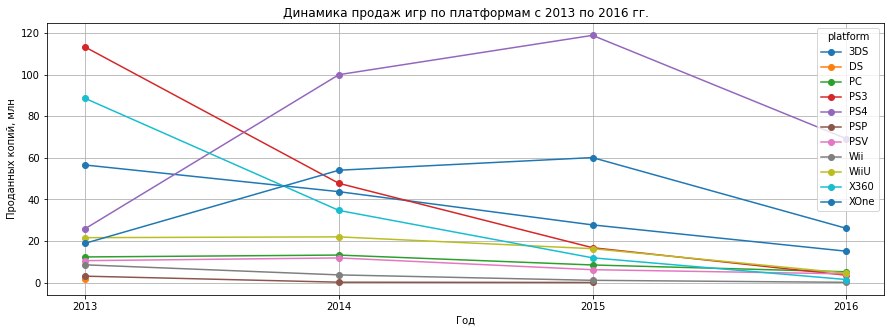

In [18]:
ax = data_new.pivot_table(index = 'year_of_release', columns = 'platform', \
                     values = 'total_sales', aggfunc = 'sum') \
                        .plot(style='o-', grid = True, figsize = (15,5))
ax.locator_params(integer=True)
plt.title('Динамика продаж игр по платформам с 2013 по 2016 гг.')
plt.xlabel('Год')
plt.ylabel('Проданных копий, млн')
plt.show()

In [19]:
data_new.query('year_of_release >= 2015')\
.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False).head()

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42


Исходя из построенных выше таблицы и графика необходимо скорректировать период выбранный для анализа. Все же рынок видеоигр развивается довольно быстро, и мы видим как старые поколения Playstation и Xbox уверенно сменяются новыми.

Поэтому выберем 2015 г. началом отчетного периода. За последний год можно наблюдать у всех отрицательную динамику объема продаж, но все же заметными лидерами на рынке являются PS4, XOne и 3DS, по ним мы и будем проводить анализ, как у самых популярных для игроков.

### «ящик с усами» по глобальным продажам игр в разбивке по платформам

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.09,0.2325,7.14
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39


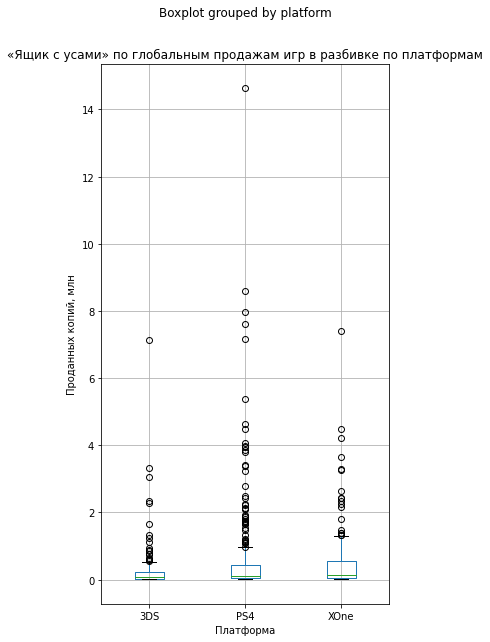

In [20]:
data_new = data_new.query('year_of_release >= 2015')
data_popular = data_new.query('platform == "PS4" or platform == "XOne" or platform == "3DS"')
data_popular.boxplot(by = 'platform', column = 'total_sales', figsize = (5, 10))
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Проданных копий, млн')
data_popular.groupby('platform')['total_sales'].describe()

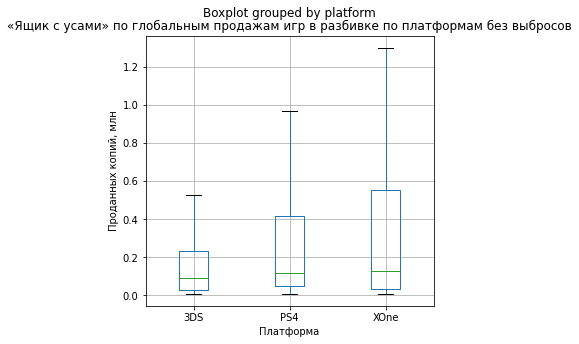

In [21]:
data_popular.boxplot(by = 'platform', column = 'total_sales', figsize = (5, 5), showfliers=False)
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам без выбросов')
plt.xlabel('Платформа')
plt.ylabel('Проданных копий, млн')
plt.show()

In [22]:
data_popular.pivot_table(index = 'platform',\
                         values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],\
                         aggfunc = 'sum')

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
3DS,7.39,23.55,10.31,1.67,42.92
PS4,83.54,12.05,63.86,28.70,188.15
XOne,28.10,0.18,50.30,7.71,86.29


По количеству проданных игр однозначно лидирует PS4. Медианное значение количества проданных копий одной игры у PS4 немногим больше, чем у XOne. 3дс значительно уступает. У XOne самый большой межквартильный размах, что свидетельствует о том, что игры могут как оказаться крайне неприбыльными, так и значительно превысить медиану. У PS4 межквартильный размах довольно меньше, но куда больше количество аномальных выбросов. Выпускаются супер популярные игры продаваемые по всему миру. 

В Америке PS4 и XOne находятся примерно на одном уровне по объему продаж, в то время как в Европе большая часть игроков предпочитает PS4. В Японии популярнее всего 3DS, а XOne почти никто и не пользуется.

### Корреляция между отзывами и продажами

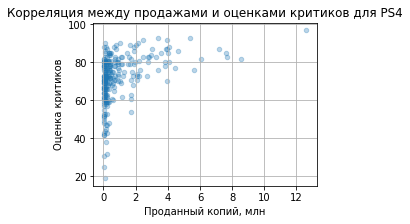

Коэффициент корреляции: 0.406567902061781


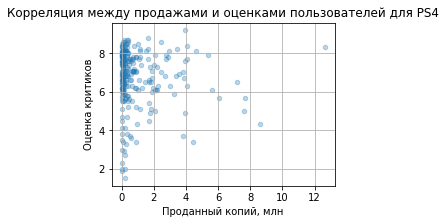

Коэффициент корреляции: -0.031957110204556376


In [24]:
data.query('platform == "PS4"') \
.plot(x = 'total_sales', 
      y = 'critic_score', 
      kind='scatter', 
      alpha = 0.3, 
      figsize=(4, 3), 
      grid=True,
      xlabel = 'Проданный копий, млн',
      ylabel = 'Оценка критиков').set_title('Корреляция между продажами и оценками критиков для PS4')
plt.show()

print('Коэффициент корреляции:', \
      data.query('platform == "PS4"')['total_sales']\
      .corr(data.query('platform == "PS4"')['critic_score']))

data.query('platform == "PS4"') \
.plot(x = 'total_sales', 
      y = 'user_score', 
      kind='scatter', 
      alpha = 0.3, 
      figsize=(4, 3), 
      grid=True,
      xlabel = 'Проданный копий, млн',
      ylabel = 'Оценка критиков').set_title('Корреляция между продажами и оценками пользователей для PS4')
plt.show()

print('Коэффициент корреляции:', \
      data.query('platform == "PS4"')['total_sales']\
      .corr(data.query('platform == "PS4"')['user_score']))

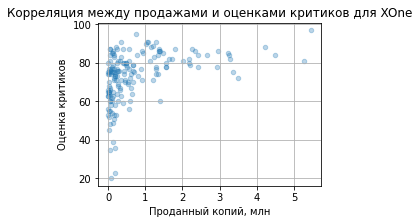

Коэффициент корреляции: 0.41699832800840175


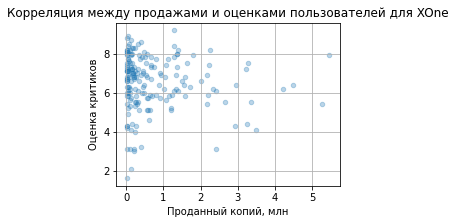

Коэффициент корреляции: -0.06892505328279412


In [25]:
data.query('platform == "XOne"') \
.plot(x = 'total_sales', 
      y = 'critic_score', 
      kind='scatter', 
      alpha = 0.3, 
      figsize=(4, 3), 
      grid=True,
      xlabel = 'Проданный копий, млн',
      ylabel = 'Оценка критиков').set_title('Корреляция между продажами и оценками критиков для XOne')
plt.show()

print('Коэффициент корреляции:', \
      data.query('platform == "XOne"')['total_sales']\
      .corr(data.query('platform == "XOne"')['critic_score']))

data.query('platform == "XOne"') \
.plot(x = 'total_sales', 
      y = 'user_score', 
      kind='scatter', 
      alpha = 0.3, 
      figsize=(4, 3), 
      grid=True,
      xlabel = 'Проданный копий, млн',
      ylabel = 'Оценка критиков').set_title('Корреляция между продажами и оценками пользователей для XOne')
plt.show()

print('Коэффициент корреляции:', \
      data.query('platform == "XOne"')['total_sales']\
      .corr(data.query('platform == "XOne"')['user_score']))

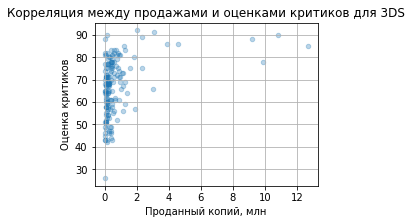

Коэффициент корреляции: 0.34873973059848346


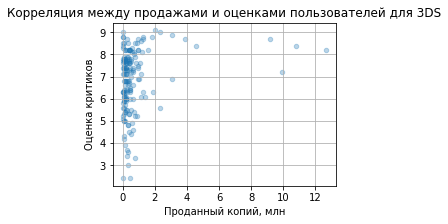

Коэффициент корреляции: 0.22207843643390884


In [26]:
data.query('platform == "3DS"') \
.plot(x = 'total_sales', 
      y = 'critic_score', 
      kind='scatter', 
      alpha = 0.3, 
      figsize=(4, 3), 
      grid=True,
      xlabel = 'Проданный копий, млн',
      ylabel = 'Оценка критиков').set_title('Корреляция между продажами и оценками критиков для 3DS')
plt.show()

print('Коэффициент корреляции:', \
      data.query('platform == "3DS"')['total_sales']\
      .corr(data.query('platform == "3DS"')['critic_score']))

data.query('platform == "3DS"') \
.plot(x = 'total_sales', 
      y = 'user_score', 
      kind='scatter', 
      alpha = 0.3, 
      figsize=(4, 3), 
      grid=True,
      xlabel = 'Проданный копий, млн',
      ylabel = 'Оценка критиков').set_title('Корреляция между продажами и оценками пользователей для 3DS')
plt.show()

print('Коэффициент корреляции:', \
      data.query('platform == "3DS"')['total_sales']\
      .corr(data.query('platform == "3DS"')['user_score']))

Для PS4 и XOne присутствует средняя прямая зависимость между оценками критиков и общими продажами. С оценками пользователей у данных платформ корреляция значительно меньше. Для 3DS одинаково небольшая корреляция как с отзывами критиков, так и с отзывами игроков


### Распределение игр по жанрам

Посмотрим на самые прибыльные жанры. Для этого возьмем медианное значение продаж, чтобы игнорировать выбросы

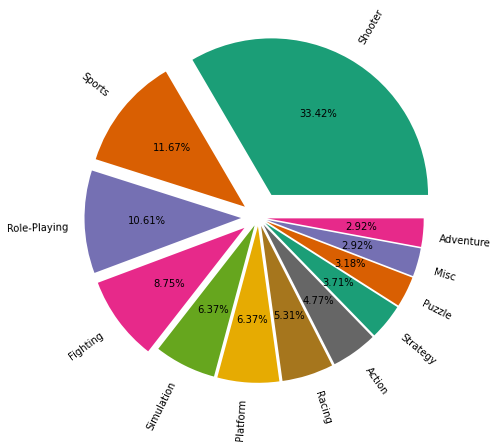

In [27]:
explode = [0.3,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
data_popular.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')\
.sort_values(by = 'total_sales', ascending = False)\
.plot(y= 'total_sales', 
      kind = 'pie', 
      radius = 1.8,
      legend = None, 
      rotatelabels = True, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%')
plt.ylabel("")
plt.show()

Стабильно высокий доход чаще всего приносят шутеры. За ними примерно поровну разделяют рынок спортивные игры, ролевые и файтинги.

In [28]:
data_popular.pivot_table(index = ['platform', 'genre'], values = 'total_sales', aggfunc = 'median')\
.sort_values(by = 'total_sales', ascending = False).head(10)


,,total_sales
platform,genre,
XOne,Shooter,0.695
PS4,Shooter,0.490
XOne,Fighting,0.310
PS4,Sports,0.300
XOne,Role-Playing,0.250
3DS,Role-Playing,0.225
PS4,Simulation,0.210
XOne,Sports,0.180
PS4,Fighting,0.165


На таблице выше можно видеть наиболее прибыльные платформы с наиболее прибыльными жанрами в ней. Шутеры на PS4 судя по всему должны принести больше всего денег. Также не стоит пренебрегать файтингами на XOne, спортивными играми на PS4 и ролевыми играми на XOne и 3DS

Посмотрим на самые популярные платформы в каждом регионе

### Популярность платформ по регионам

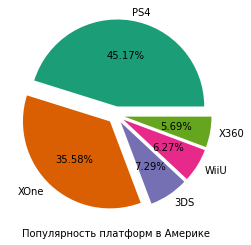

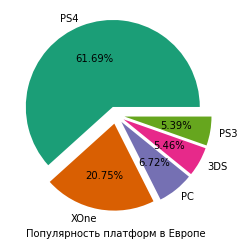

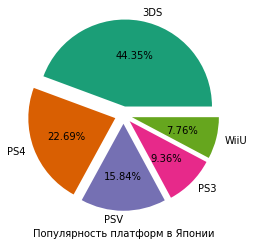

In [29]:
explode = [0.1,0.1,0.1,0.1,0.1]
data_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False).head() \
.plot(kind = 'pie', 
      y = 'na_sales',
      legend = None, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%')
plt.xlabel("Популярность платформ в Америке")
plt.ylabel('')

plt.show()

data_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False).head()\
.plot(kind = 'pie', 
      y = 'eu_sales',
      legend = None, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%')
plt.xlabel("Популярность платформ в Европе")
plt.ylabel('')

plt.show()

data_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False).head()\
.plot(kind = 'pie', 
      y = 'jp_sales',
      legend = None, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%')
plt.xlabel("Популярность платформ в Японии")
plt.ylabel('')

plt.show()

В Америке продажи PS4 немногим опережают XOne, в то время как в Европе этот разрыв значительно больше, а в Японии больше всего приносят продажи 3DS, затем с небольшим отставанием PS4, а XOne совсем не пользуется популярностью

Оценим популярность жанров в каждом регионе

### Популярность жанров по регионам

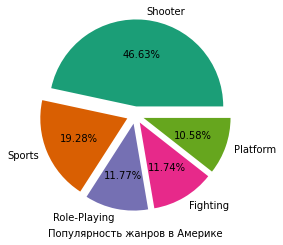

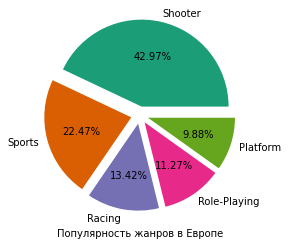

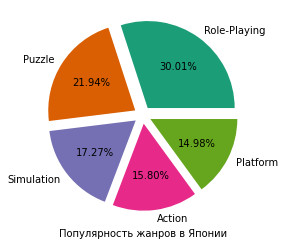

In [30]:
data_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'mean')\
.sort_values(by = 'na_sales', ascending = False).head()\
.plot(kind = 'pie', 
      y = 'na_sales',
      legend = None, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%')
plt.xlabel("Популярность жанров в Америке")
plt.ylabel('')

plt.show()

data_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'mean')\
.sort_values(by = 'eu_sales', ascending = False).head()\
.plot(kind = 'pie', 
      y = 'eu_sales',
      legend = None, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%')
plt.xlabel("Популярность жанров в Европе")
plt.ylabel('')

plt.show()

data_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'mean')\
.sort_values(by = 'jp_sales', ascending = False).head()\
.plot(kind = 'pie', 
      y = 'jp_sales',
      legend = None, 
      counterclock = True, 
      colors=plt.cm.Dark2.colors, 
      explode = explode,
      autopct='%.2f%%',
    normalize=True)
plt.xlabel("Популярность жанров в Японии")
plt.ylabel('')

plt.show()

Рынок Америки и Европы практически одинаковый, и распределение по жанрам как и в круговой диаграмме выше, а вот в Японии все индивидуально. В приоритете ролевые игры, паззлы, а за ними симуляторы, экшен и платформенные игры

Посмотрим как влияет на продажи возрастной рейтинг от организации ESRB

### Влияние возрастного рейтинга по регионам

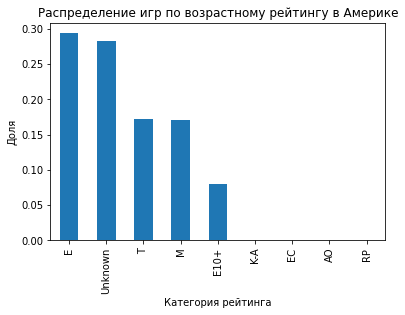

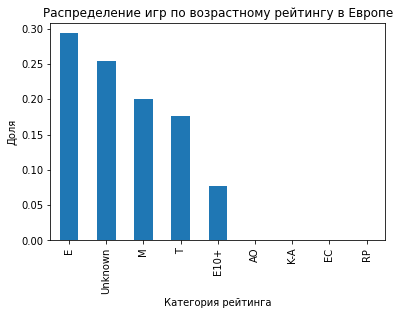

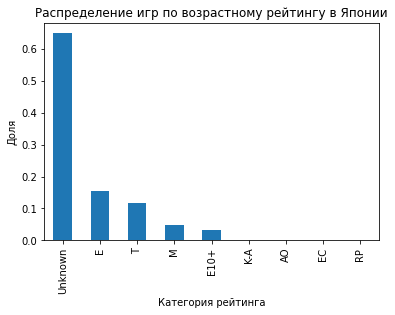

In [31]:
data_rating = data.pivot_table(index = 'rating', 
                               values = ['na_sales', 'eu_sales', 'jp_sales'], 
                               aggfunc = 'sum').reset_index()

column = ['na_sales', 'eu_sales', 'jp_sales']

for col in column:
    data_rating[col] /= data[col].sum()

    
data_rating.sort_values(by = 'na_sales', ascending = False) \
.plot(kind = 'bar',
      x = 'rating',                    
      y = 'na_sales', 
      xlabel = 'Категория рейтинга', 
      ylabel = 'Доля', 
      legend = None) 
plt.title('Распределение игр по возрастному рейтингу в Америке')

plt.show()

data_rating.sort_values(by = 'eu_sales', ascending = False) \
.plot(kind = 'bar',
      x = 'rating',                    
      y = 'eu_sales', 
      xlabel = 'Категория рейтинга', 
      ylabel = 'Доля', 
      legend = None) 
plt.title('Распределение игр по возрастному рейтингу в Европе')

plt.show()

data_rating.sort_values(by = 'jp_sales', ascending = False) \
.plot(kind = 'bar',
      x = 'rating',                    
      y = 'jp_sales', 
      xlabel = 'Категория рейтинга', 
      ylabel = 'Доля', 
      legend = None) 
plt.title('Распределение игр по возрастному рейтингу в Японии')

plt.show()

В Европе и Америке определенно лидируют игры с рейтингом Е - для всех. В Японии больше всего игр без рейтинга

## Проверка гипотез

Приступим к проверки гипотезу и сформулируем первую:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [32]:
data_hypothesis = data_new.query('not critic_score.isna() and not user_score.isna()')

sample_1 = data_hypothesis.loc[data_hypothesis['platform'] == "PC", 'user_score']
sample_2 = data_hypothesis.loc[data_hypothesis['platform'] == "XOne", 'user_score']

alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.3280257221394691
Не получилось отвергнуть нулевую гипотезу


И вторую:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые 

H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [33]:
sample_1 = data_hypothesis.loc[data_hypothesis['genre'] == "Action", 'user_score']
sample_2 = data_hypothesis.loc[data_hypothesis['genre'] == "Sports", 'user_score']

alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.5087325539494814e-07
Отвергаем нулевую гипотезу


Мы проверили гипотезы тестом Стьюдента, т.к. у нас независимые генеральные совокупности с нормальным распределением.

Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC 

Но гипотезу о том, что средние пользовательских рейтингов жанров Action и Sports одинаковые, отвергнуть удалось

## Вывод

Мы проанализировали рынок гейм-индустрии и посмотрели на влияние различных факторов. В результате мы можем описать универсальную успешную игру, которая принесет много продаж по всему миру:

1. Если наши покупатели не в Японии, то игра должна быть разработана для PS4, игра на XOne принесет немногим меньше прибыли. Для рынка в Японии игры на XOne неинтересны совсем, в приоритете консоль 3DS

2. Больше всего прибыли принесут шутеры, чуть менее популярны спортивные игры, ролевые и файтинги (Япония исключение)

3. Нельзя не пренебрегать рейтингами критиков, для некоторых игроков это становится важным фактором при покупке игры. А вот рейтинги пользователей с коммерческой точки зрения совсем неинтересны.

4. И последний немаловажный пункт - возрастной рейтинг. В Европе и Америке наиболее интересны игры для всех с рейтингом Е, за ними идут игры без рейтинга, и нормальным спросом пользуются игры для подростков и взрослых. В Японии все снова наоборот, и большую часть рынка занимают игры без рейтинга

